In [1]:
import pandas as pd

In [22]:
def process_file(path):
    data = pd.read_csv(path, header = None, names =['CHR','LD'], sep = ' ')
    data['blk'] = data.apply(lambda row: f"chr{row['CHR']}, blk{row['LD']}", axis = 1)
    return data

In [23]:
path='/gpfs/commons/home/tlin/output/CARMA/'
bl= process_file(path+'bl_unfinished3.txt')
omics = process_file(path+ 'omics_unfinished3.txt')
omics_dl = process_file(path+'omics_dl_unfinished3.txt')

In [24]:
dfs = [bl, omics, omics_dl]
common_blks = set(dfs[0]['blk']).intersection(*(set(df['blk']) for df in dfs[1:]))
print(common_blks)

{'chr10, blk67', 'chr15, blk2', 'chr11, blk66', 'chr11, blk60', 'chr10, blk61', 'chr3, blk54', 'chr19, blk29', 'chr19, blk21', 'chr2, blk123', 'chr7, blk94', 'chr22, blk1', 'chr10, blk109', 'chr4, blk10', 'chr10, blk98', 'chr1, blk18', 'chr4, blk22', 'chr14, blk4', 'chr18, blk38', 'chr11, blk91', 'chr12, blk52', 'chr17, blk9', 'chr10, blk91', 'chr11, blk69', 'chr11, blk62', 'chr11, blk65', 'chr21, blk11', 'chr18, blk5', 'chr10, blk57', 'chr6, blk108', 'chr15, blk44', 'chr7, blk68', 'chr6, blk80', 'chr2, blk152', 'chr6, blk81', 'chr6, blk99', 'chr9, blk50', 'chr6, blk107', 'chr3, blk21', 'chr3, blk142', 'chr2, blk172', 'chr5, blk96', 'chr11, blk63', 'chr14, blk42', 'chr9, blk85', 'chr7, blk119', 'chr2, blk146', 'chr5, blk98', 'chr11, blk84', 'chr4, blk49', 'chr14, blk6', 'chr7, blk90', 'chr6, blk74', 'chr15, blk58', 'chr6, blk75', 'chr7, blk86', 'chr11, blk61', 'chr2, blk24', 'chr11, blk42', 'chr6, blk72', 'chr6, blk85', 'chr7, blk96', 'chr6, blk82', 'chr9, blk15', 'chr17, blk11', 'chr1

In [32]:
from upsetplot import from_contents
blk_list = from_contents({
                          'bl':bl.blk.unique().tolist(),
                          'omcis':omics.blk.unique().tolist(),
                          'omics_dl':omics_dl.blk.unique().tolist()}
                         )

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

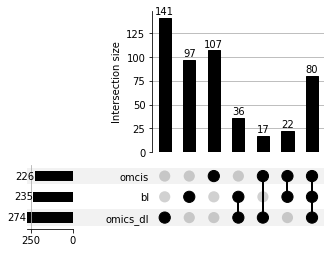

In [34]:
UpSet(blk_list , show_counts=True).plot()

In [44]:
blk_list

id
bl    omcis omics_dl              
True  True  True       chr1, blk18
            True       chr1, blk25
      False False      chr1, blk99
            True      chr1, blk106
      True  False     chr1, blk159
...                            ...
False False True      chr14, blk22
            True       chr17, blk7
            True      chr17, blk36
            True      chr17, blk39
            True       chr20, blk2

[500 rows x 1 columns]

In [52]:
type(blk_list)

pandas.core.frame.DataFrame

In [54]:
blk_list.index

MultiIndex([( True,  True,  True),
            ( True,  True,  True),
            ( True, False, False),
            ( True, False,  True),
            ( True,  True, False),
            ( True,  True, False),
            ( True,  True,  True),
            ( True,  True, False),
            ( True,  True, False),
            ( True,  True,  True),
            ...
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True),
            (False, False,  True)],
           names=['bl', 'omcis', 'omics_dl'], length=500)

In [56]:
blk_list.loc[( True,  True,  True)]

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


id
bl   omcis omics_dl              
True True  True       chr1, blk18
           True       chr1, blk25
           True       chr2, blk24
           True      chr2, blk123
           True      chr2, blk146
...                           ...
           True       chr20, blk4
           True      chr20, blk19
           True      chr21, blk11
           True      chr21, blk29
           True       chr22, blk1

[80 rows x 1 columns]